# EDA

Some descriptives plots using Chetty's data (life expectancy).

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# import plotly.plotly as py
# import plotly.graph_objs as go
import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
%matplotlib inline
import itertools

In [11]:
# load data
df = pd.read_csv('../data/le_cov.csv')
print(df.shape)

(12448, 34)


In [12]:
df.head()

,county,gender,income_q,le,county_name,population,statename,stateabbrv,density,gini,...,unemployment,pct_black,pct_hispanic,obesity,smoking,exercise,male,q2,q3,q4
0,1001,F,Q1,80.830627,Autauga,43671,Alabama,AL,73.277412,0.379976,...,0.037379,17.008999,1.396808,0.375000,0.333333,0.500000,0,0,0,0
1,1001,F,Q2,84.011551,Autauga,43671,Alabama,AL,73.277412,0.379976,...,0.037379,17.008999,1.396808,0.238095,0.238095,0.666667,0,1,0,0
2,1001,F,Q3,84.333076,Autauga,43671,Alabama,AL,73.277412,0.379976,...,0.037379,17.008999,1.396808,0.260870,0.208333,0.666667,0,0,1,0
3,1001,F,Q4,85.134392,Autauga,43671,Alabama,AL,73.277412,0.379976,...,0.037379,17.008999,1.396808,0.133333,0.133333,0.800000,0,0,0,1
4,1001,M,Q1,73.237656,Autauga,43671,Alabama,AL,73.277412,0.379976,...,0.037379,17.008999,1.396808,0.375000,0.333333,0.500000,1,0,0,0


Plots by Gender and Quantile

In [62]:
gender = ['M', 'F']
quartile = ['Q1', 'Q2', 'Q3', 'Q4']
variables = ['gini', 'relative_mob']
comb = list(itertools.product(gender, quartile, variables))

In [45]:
gini_min_val = df['gini'].min() - 0.03
gini_max_val = df['gini'].max() + 0.03
rm_max_val = df

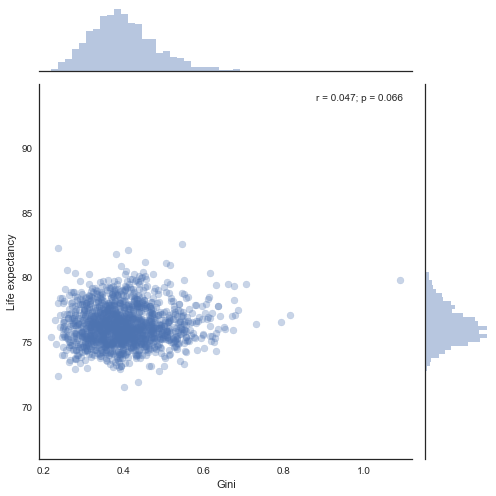

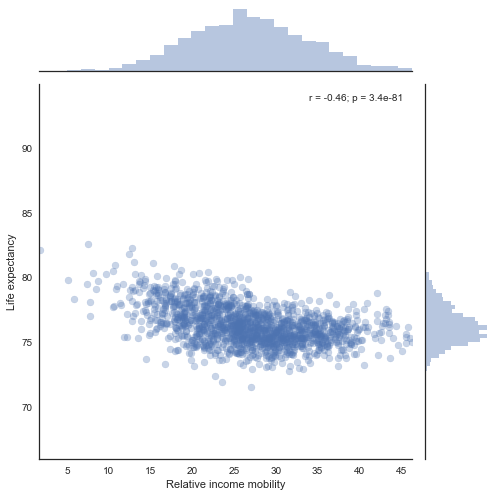

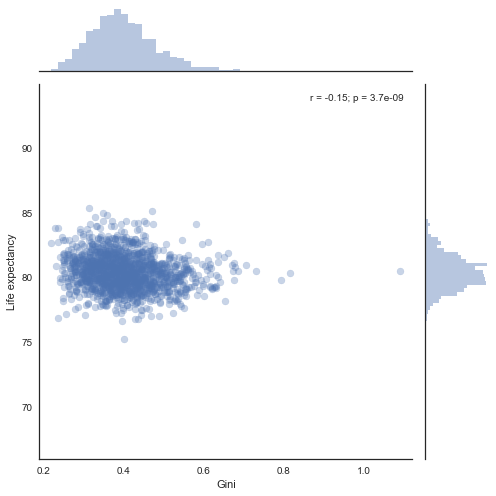

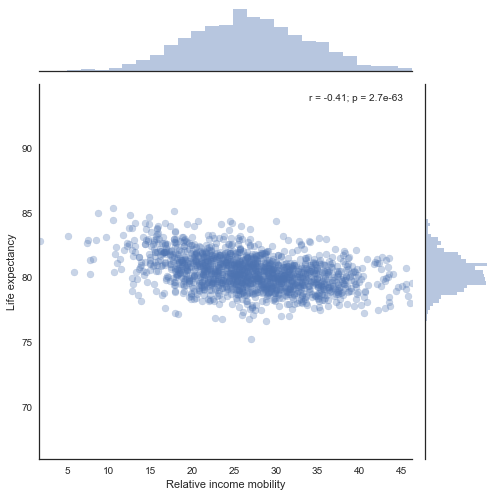

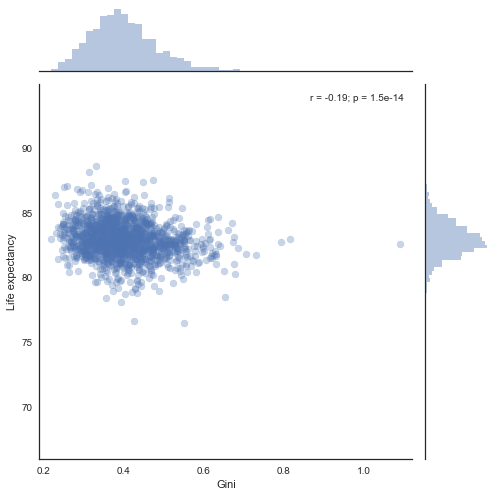

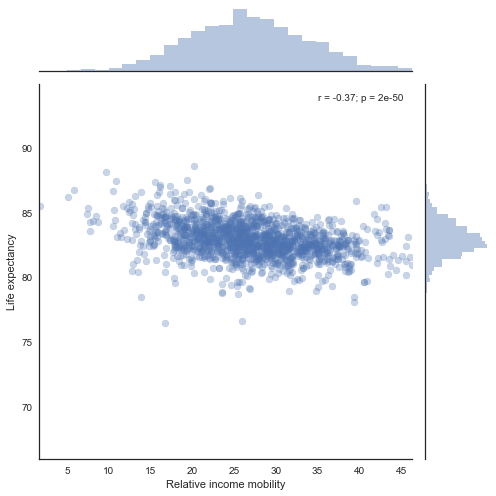

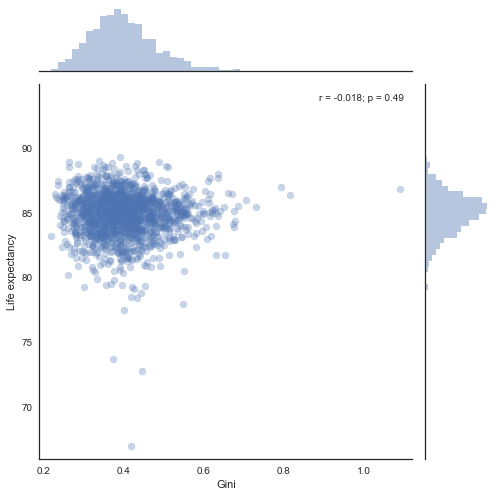

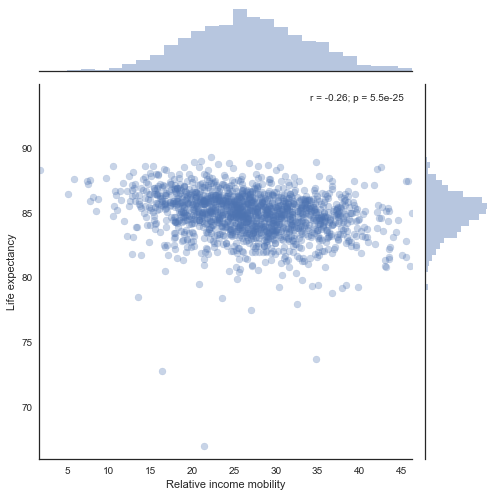

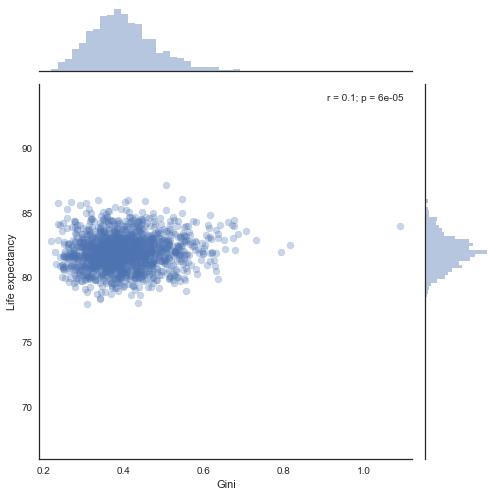

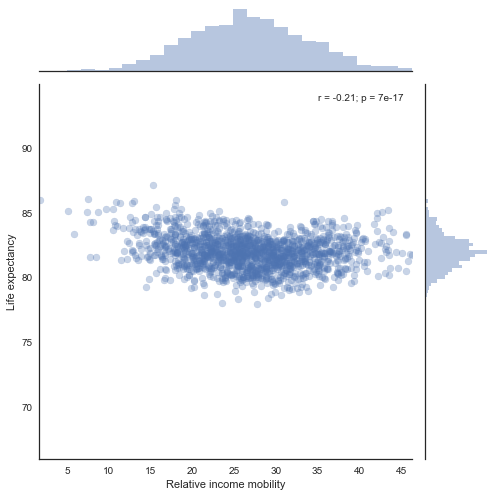

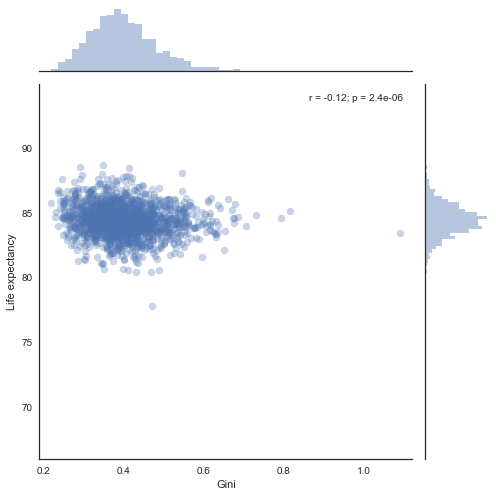

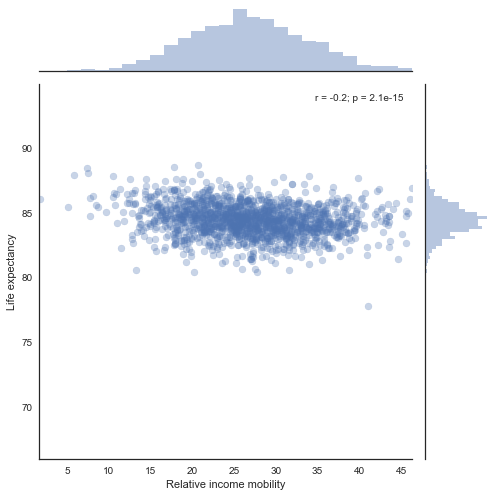

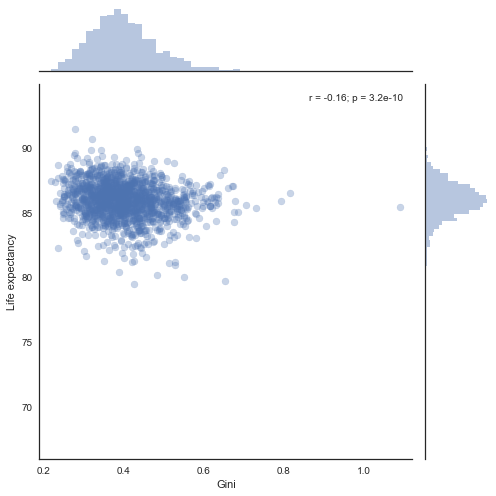

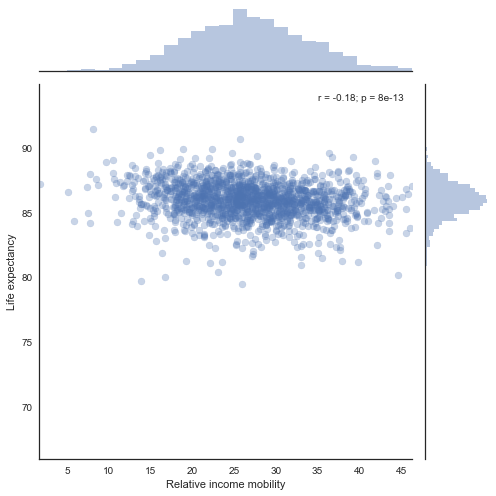

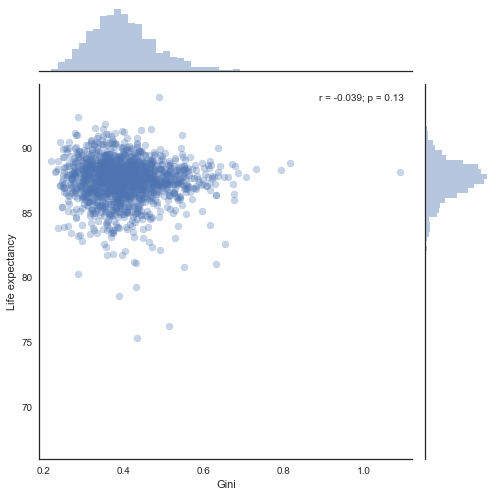

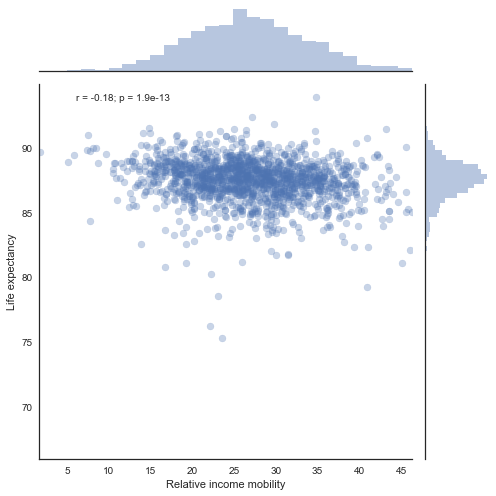

In [74]:
for g,q,v in comb:
    
    map_var = {'gini':'Gini', 'relative_mob':'Relative income mobility'}

    # limits
    le_min_val = df['le'].min() - 1.0
    le_max_val = df['le'].max() + 1.0
    var_min_val = df[v].min() - 0.03
    var_max_val = df[v].max() + 0.03
    
    # select data
    select = (df.gender==g) & (df.income_q==q)
    
    plot = sns.jointplot(v,'le',
                         annot_kws=dict(stat="r"),
                         data=df[select], ratio=5,
                         ylim=(le_min_val,le_max_val), 
                         xlim=(var_min_val,var_max_val), size=7,alpha=0.3)
    plot.set_axis_labels(xlabel=map_var[v], ylabel='Life expectancy');
    plot.savefig('plots/'+v+'_'+g+'_'+q+'.pdf')

# Other plots

In [11]:
def text_counties(df, selection):
    counties = list(df.loc[selection, 'county_name'].values +  ', '  + df.loc[selection, 'stateabbrv'].values)
    pop = ['<br/>Population: '+str(p) for p in df.loc[selection, 'population']]
    return [a + ' ' +  b for a,b in zip(counties, pop)]

In [99]:
# duplicates
df_counties = df.drop_duplicates(['county', 'gini', 'relative_mob', 'absolute_mob'], keep='last').copy()

In [100]:
regions = {
   'Northeast':['Connecticut','Maine' ,'Massachusetts' ,'New Hampshire' ,'Rhode Island' ,'Vermont' ,'New Jersey' ,'New York' ,'Pennsylvania'],
   'Midwest':['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'], 
   'South':['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District Of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'], 
   'West':['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']   
    }

In [104]:
map_regions = {}
for v,k in regions.items():
    map_regions.update({s:v for s in k})

df_counties['region'] = df_counties.statename.map(map_regions).values